<a href="https://colab.research.google.com/github/Dexterchhoria/ml_project/blob/main/BTP_3rdyear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                 Open        High         Low       Close  \
Date                                                                        
2025-05-02 00:00:00-04:00  205.820091  206.718922  201.895245  205.081070   
2025-05-05 00:00:00-04:00  202.834025  203.832716  197.950430  198.629532   
2025-05-06 00:00:00-04:00  197.950420  200.387212  196.761976  198.250015   
2025-05-07 00:00:00-04:00  198.909155  199.178806  192.996910  195.992981   
2025-05-08 00:00:00-04:00  197.461064  199.788014  194.425036  197.231369   
2025-05-09 00:00:00-04:00  198.739390  200.277366  197.281295  198.270004   
2025-05-12 00:00:00-04:00  210.970001  211.270004  206.750000  210.789993   
2025-05-13 00:00:00-04:00  210.429993  213.399994  209.000000  212.929993   
2025-05-14 00:00:00-04:00  212.429993  213.940002  210.580002  212.330002   
2025-05-15 00:00:00-04:00  210.994995  212.960007  209.539993  211.449997   

                              Volume  Dividends  Stock Splits  
Date       

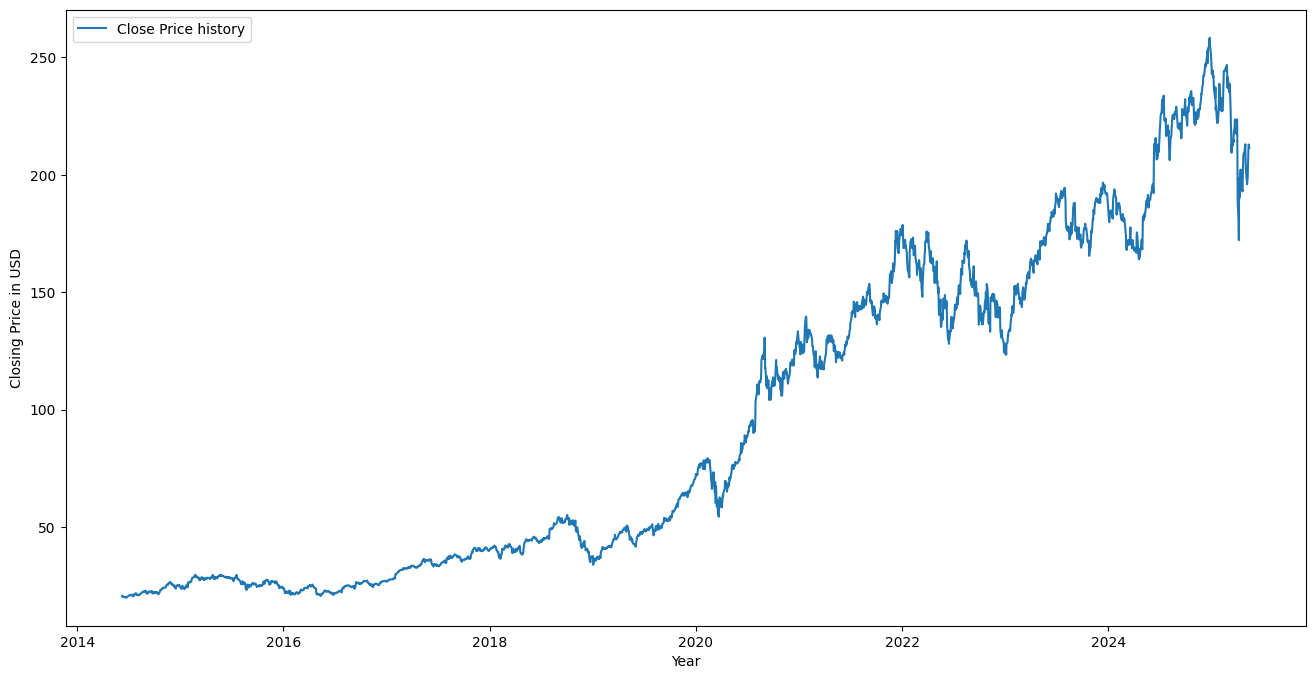

(1750, 1)
(1002, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
27/27 - 5s - 199ms/step - loss: 0.0025
Epoch 2/20
27/27 - 2s - 91ms/step - loss: 1.8071e-04
Epoch 3/20
27/27 - 2s - 78ms/step - loss: 1.3628e-04
Epoch 4/20
27/27 - 3s - 97ms/step - loss: 1.3491e-04
Epoch 5/20
27/27 - 2s - 80ms/step - loss: 1.3116e-04
Epoch 6/20
27/27 - 2s - 65ms/step - loss: 1.2124e-04
Epoch 7/20
27/27 - 3s - 119ms/step - loss: 1.2394e-04
Epoch 8/20
27/27 - 2s - 61ms/step - loss: 1.1952e-04
Epoch 9/20
27/27 - 3s - 122ms/step - loss: 1.1888e-04
Epoch 10/20
27/27 - 2s - 67ms/step - loss: 1.0962e-04
Epoch 11/20
27/27 - 2s - 61ms/step - loss: 1.0212e-04
Epoch 12/20
27/27 - 3s - 94ms/step - loss: 1.0143e-04
Epoch 13/20
27/27 - 2s - 62ms/step - loss: 1.0844e-04
Epoch 14/20
27/27 - 3s - 114ms/step - loss: 1.2040e-04
Epoch 15/20
27/27 - 2s - 92ms/step - loss: 9.7527e-05
Epoch 16/20
27/27 - 2s - 61ms/step - loss: 8.9575e-05
Epoch 17/20
27/27 - 2s - 62ms/step - loss: 9.7709e-05
Epoch 18/20
27/27 - 2s - 62ms/step - loss: 9.1743e-05
Epoch 19/20
27/27 - 2s - 63ms/step - 

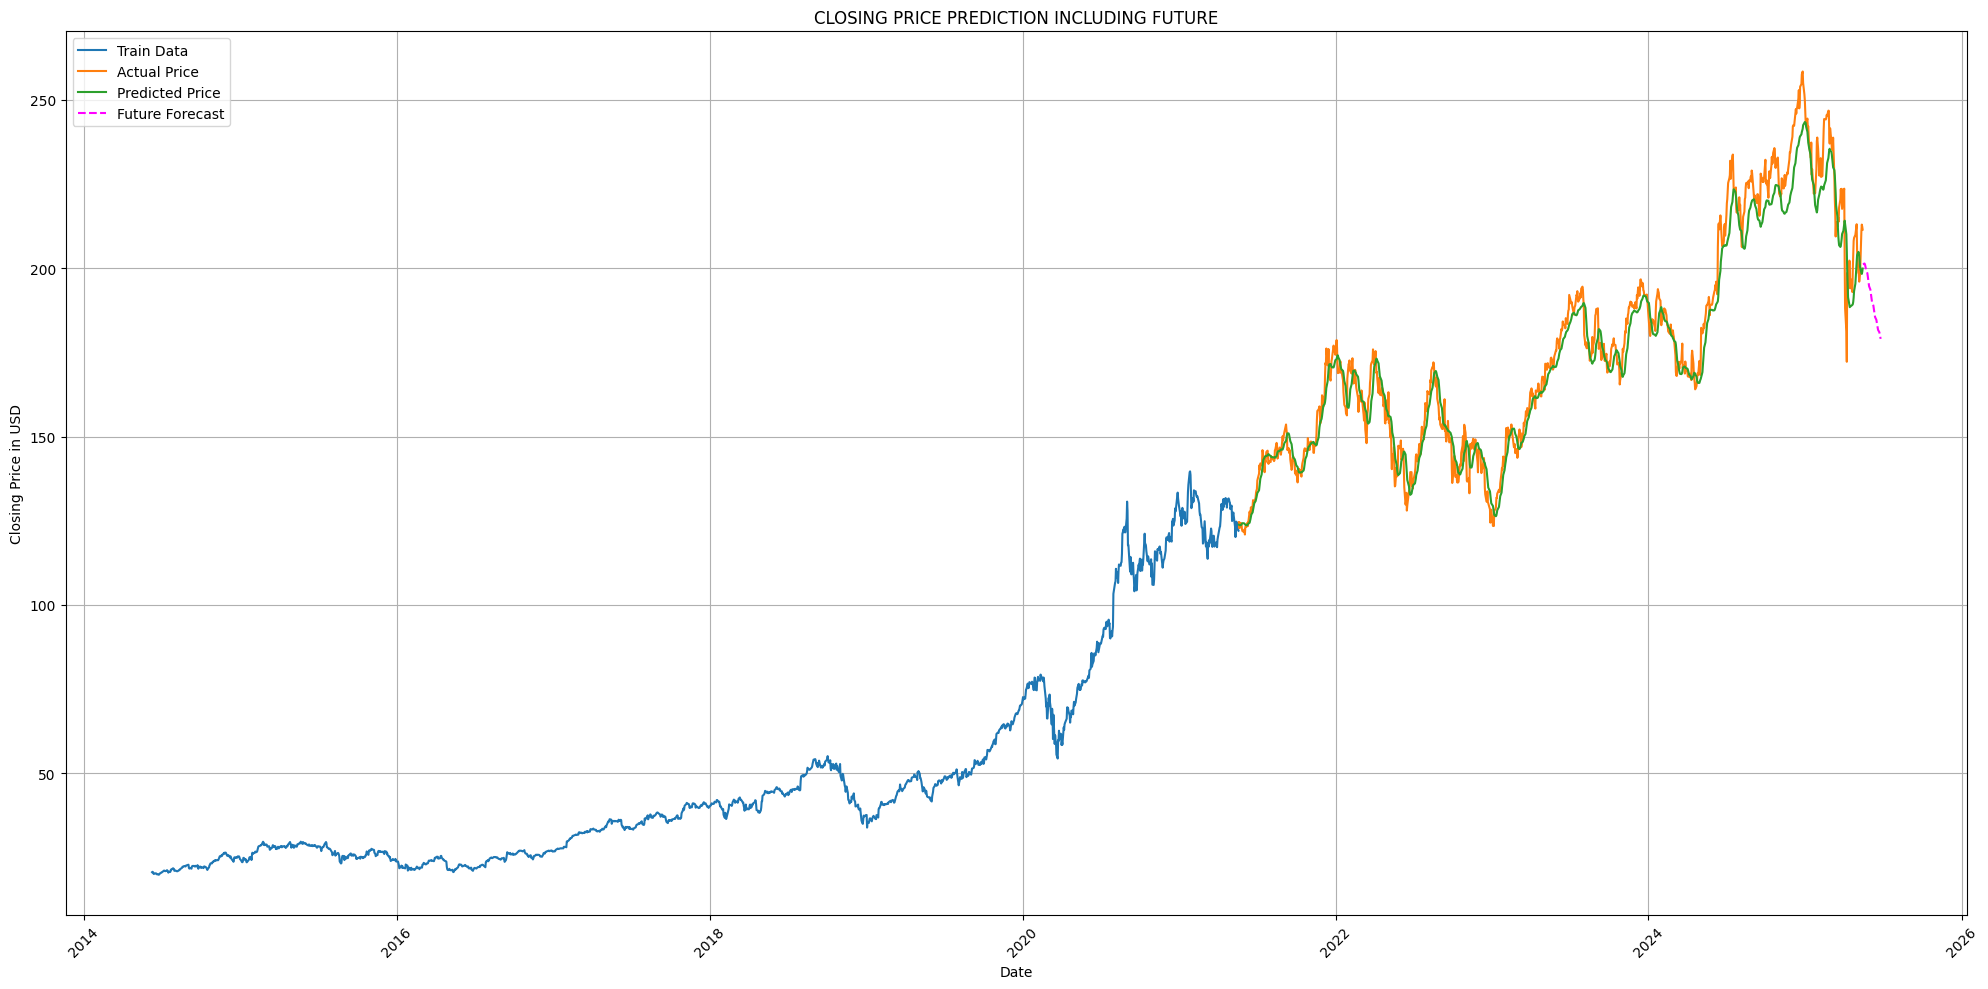

In [4]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import plotly.graph_objects as go
from plotly.subplots import make_subplots



!pip install yfinance

# Importing Libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
# @title
def stock_data(stock, start_date, end_date):
    tickerSymbol = stock
    tickerData = yf.Ticker(tickerSymbol)
    tickerDf = tickerData.history(period='1d', start=start_date, end=end_date)
    return tickerDf

df = stock_data("AAPL", "2014-06-08", "2025-06-08")
df.head()
last_10_rows = df.iloc[-10:]
print(last_10_rows)
fig = plt.figure(figsize=(16,8))
plt.xlabel("Year")
plt.ylabel("Closing Price in USD")
plt.plot(df['Close'], label='Close Price history')
plt.legend()
plt.show()
df.dtypes
df.describe()
df.reset_index(level="Date", inplace=True)
df.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
data = df.sort_index(ascending=True, axis=0)
df1 = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])
for i in range(0, len(data)):
    df1["Date"][i] = data['Date'][i]
    df1["Close"][i] = data["Close"][i]

df1.index = df1.Date
df1.drop("Date", axis=1, inplace=True)
df1.head()
data = df1.values
train = data[0:1750, :]
test = data[1750:, :]

print(train.shape)
print(test.shape)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
x_train, y_train = [], []
window = 60

for i in range(window, len(train)):
    x_train.append(scaled_data[i-window:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
inputs = df1[len(df1) - len(test) - window:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(window, inputs.shape[0]):
    x_test.append(inputs[i-window:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()
model.fit(x_train, y_train, epochs=20, batch_size=64, verbose=2)
closing_price = model.predict(x_test)
train_predict = model.predict(x_train)

closing_price = scaler.inverse_transform(closing_price)
train_predict = scaler.inverse_transform(train_predict)

# Forecasting the next 30 days
future_days = 30
last_sequence = inputs[-window:]  # Last 60 days
predicted_future = []

for _ in range(future_days):
    pred = model.predict(last_sequence.reshape(1, window, 1), verbose=0)
    predicted_future.append(pred[0, 0])
    last_sequence = np.append(last_sequence[1:], pred, axis=0)

predicted_future = scaler.inverse_transform(np.array(predicted_future).reshape(-1, 1))

# Creating future dates
last_date = df1.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days, freq='B')  # Business days
future_df = pd.DataFrame({'Close': predicted_future.ravel()}, index=future_dates)


mse = math.sqrt(mean_squared_error(test, closing_price))
print(f"Root Mean Squared Error: {mse}")
train = df1[:1750]
test = df1[1750:]
test['Predictions'] = closing_price

# plt.figure(figsize=(17,8))
# plt.xlabel("Year")
# plt.ylabel("Closing Price in USD")
# plt.title("CLOSING PRICE PREDICTION")
# plt.plot(train['Close'])
# plt.plot(test[['Close', 'Predictions']])
# plt.legend(["Train Data", "Actual Price", "Predicted Price"], loc="lower right")
# plt.show()

# Combine all data for plotting
plt.figure(figsize=(20,10))
plt.title("CLOSING PRICE PREDICTION INCLUDING FUTURE")
plt.xlabel("Date")
plt.ylabel("Closing Price in USD")
plt.plot(train['Close'], label='Train Data')
plt.plot(test['Close'], label='Actual Price')
plt.plot(test.index, test['Predictions'], label='Predicted Price')
plt.plot(future_df.index, future_df['Close'], label='Future Forecast', linestyle='dashed', color='magenta')

plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_actual = test['Close'].values
y_pred = closing_price.ravel()

mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_pred)
mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100
accuracy = 100 - mape

print(f"📏 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📐 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"📊 R² Score: {r2:.4f}")
print(f"📎 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"✅ Regression Accuracy: {accuracy:.2f}%")


📏 Mean Absolute Error (MAE): 5.0404
📐 Mean Squared Error (MSE): 44.5945
📉 Root Mean Squared Error (RMSE): 6.6779
📊 R² Score: 0.9574
📎 Mean Absolute Percentage Error (MAPE): 2.77%
✅ Regression Accuracy: 97.23%


In [1]:
pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.9 MB/s eta 0:00:00


In [2]:
pip install statsmodels


<Axes: title={'center': 'ARIMA Fitted vs Actual'}, xlabel='Date'>

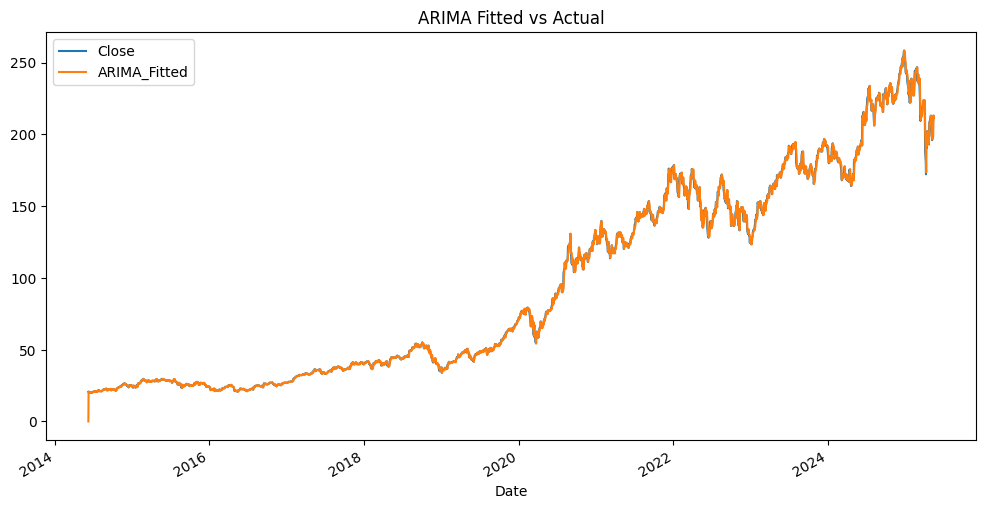

In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA on historical closing prices
arima_model = ARIMA(df1['Close'], order=(5, 1, 0))  # You can tune (p,d,q)
arima_result = arima_model.fit()

# Optional: Plot the in-sample fit
df1['ARIMA_Fitted'] = arima_result.fittedvalues
df1[['Close', 'ARIMA_Fitted']].plot(figsize=(12, 6), title='ARIMA Fitted vs Actual')


In [16]:
# Forecast next 30 days
arima_forecast = arima_result.forecast(steps=30)

# Create future date index (same as LSTM)
future_dates = future_df.index  # Reuse the same index you used for LSTM predictions

# Create a DataFrame for ARIMA forecast
arima_df = pd.DataFrame({'ARIMA_Prediction': arima_forecast.values}, index=future_dates)


In [17]:
# Combine LSTM and ARIMA predictions
ensemble_df = pd.DataFrame({
    'LSTM': future_df['Close'],
    'ARIMA': arima_df['ARIMA_Prediction']
})

# Ensemble average
ensemble_df['Ensemble'] = ensemble_df.mean(axis=1)


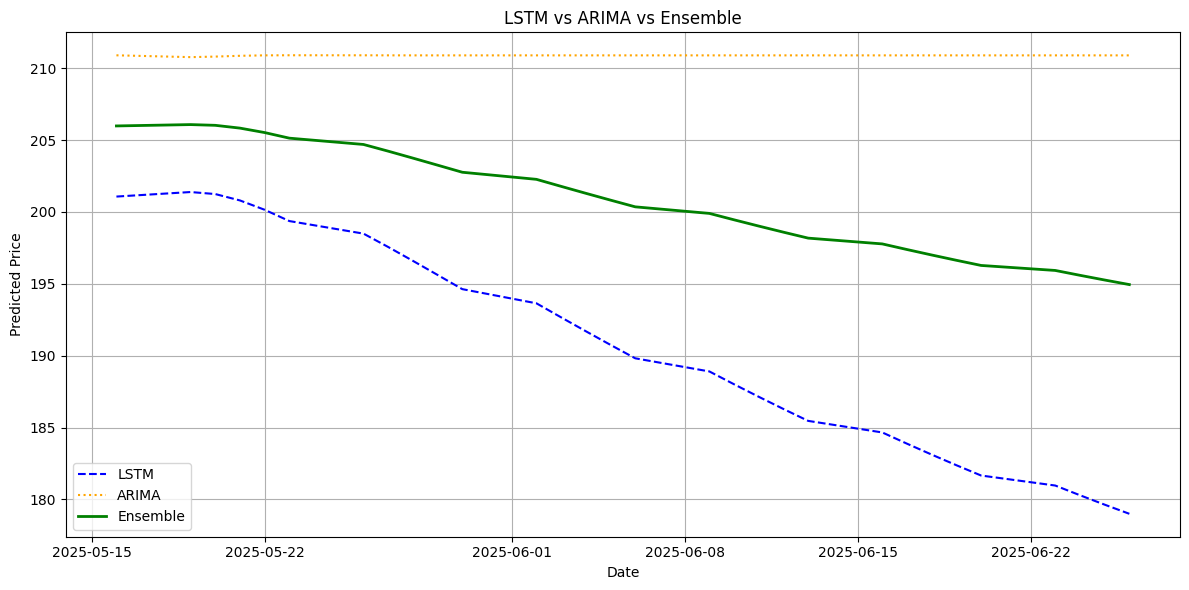

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(ensemble_df.index, ensemble_df['LSTM'], label='LSTM', linestyle='--', color='blue')
plt.plot(ensemble_df.index, ensemble_df['ARIMA'], label='ARIMA', linestyle=':', color='orange')
plt.plot(ensemble_df.index, ensemble_df['Ensemble'], label='Ensemble', color='green', linewidth=2)
plt.title('LSTM vs ARIMA vs Ensemble')
plt.xlabel('Date')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
